SVD example for random oscillatory functions to demonstrate the effectiveness of SVD. Based on an example developed by Prof. B. Hosseini.

First, we generate some random functions. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

In [2]:
# function from Lec 4

def f(x):
  val = (3*np.sin(2*x) + 0.5*np.tanh(0.5*(x-3)) + 0.2*np.exp(-(x- 4)**2)
  + 1.5*np.sin(5*x) + 4*np.cos(3*(x-6)**2))/10 + (x/20)**3

  return val


# covariance function 

def k(t, l):

  val = 0.5*np.exp( - ( (t**2)/(2*l**2) ) )

  return val

L = 12
N_grid = 2**11

grid = np.linspace(0, 12, N_grid)

f_vals = np.asmatrix(f(grid))

# construct covariance matrix 
l = L/10

dist = distance_matrix(np.transpose(np.asmatrix(grid)), np.transpose(np.asmatrix(grid)))

C = k(dist, l)
nugget = 1e-4*np.identity(C.shape[0])

CC = np.linalg.cholesky(C  + nugget)

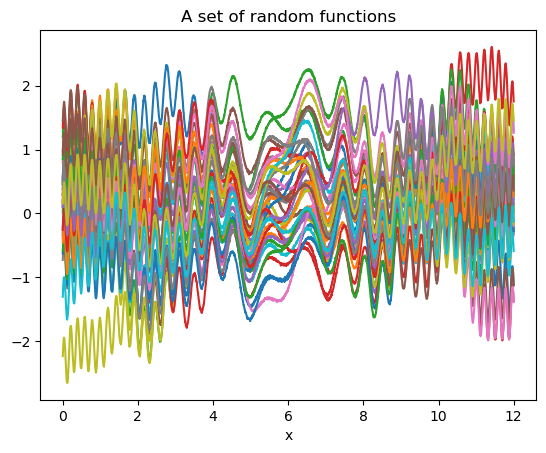

(2048, 40)


In [3]:
N_samples = 40 # number of random functions we want

data = []
for i in range(N_samples):
  
  sample = np.dot(CC,np.random.randn(N_grid,1)) + np.reshape(f_vals, (N_grid, 1))

  data.append(sample)

  plt.plot(grid, sample)

data = np.transpose(np.squeeze(np.asarray(data)))

plt.xlabel('x')

plt.title('A set of random functions')

plt.show()

print(data.shape)

While these functions are random there is clearly a lot of structure among them. For example they are smooth in the middle and more oscillatory on the sides. We will now use PCA to reveal these features. 

In [4]:
centered_data = data - np.mean(data, axis=1)[:, None] 

dU, ds, dVt = np.linalg.svd(centered_data)

print(dU.shape, ds.shape, dVt.shape )

(2048, 2048) (40,) (40, 40)


First, we plot the singular values to see the effective dimension of the data set. 

Text(0, 0.5, '$\\Sigma E_j$')

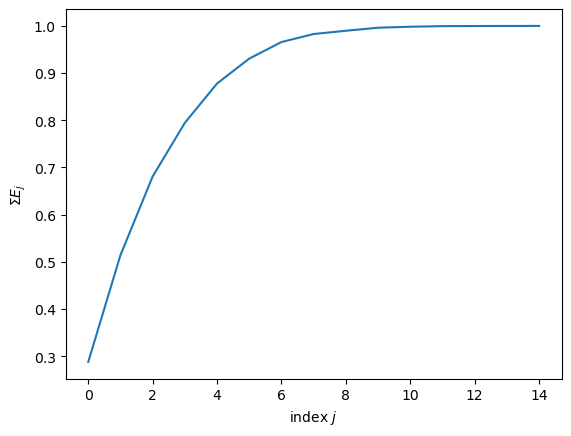

In [5]:
E = np.power(ds,2)/np.sum(np.power(ds,2))
plt.plot(np.cumsum(E)[:15])

plt.xlabel('index $j$')
plt.ylabel('$\Sigma E_j$')

<function matplotlib.pyplot.show(close=None, block=None)>

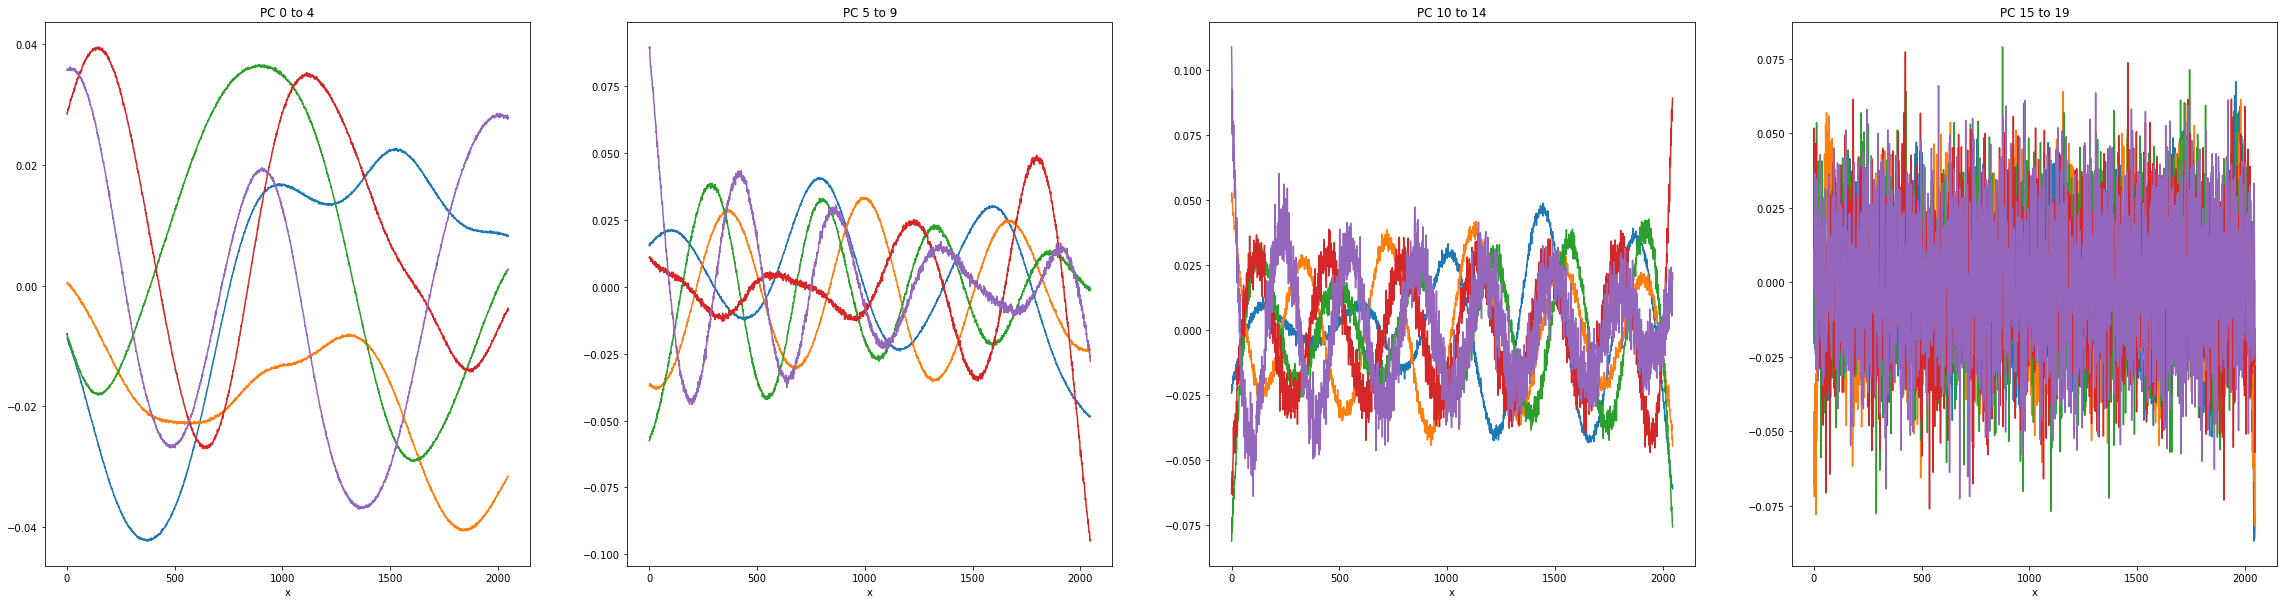

In [6]:
fig, ax = plt.subplots(1,4, figsize=(40,10))

for k in range(4):

  for j in range(5):

    ax[k].plot(dU[:, k*5 + j])
    
  ax[k].set_xlabel('x')
  ax[k].set_title('PC '+str(k*5)+' to '+str((k+1)*5-1))

plt.show

[1.02617372e+02 9.09194239e+01 7.80536290e+01 6.44442500e+01
 5.51803762e+01 4.39200412e+01 3.58015547e+01 2.48938599e+01
 1.59000655e+01 1.53230940e+01 8.71142322e+00 6.75309430e+00
 3.17302805e+00 2.20201254e+00 1.51803594e+00 8.83580859e-01
 6.37482369e-01 5.56623157e-01 4.91760242e-01 4.88477857e-01
 4.81921238e-01 4.80121289e-01 4.75748002e-01 4.72700430e-01
 4.66507400e-01 4.62343623e-01 4.55853807e-01 4.52617271e-01
 4.46865732e-01 4.44216193e-01 4.42521875e-01 4.36328164e-01
 4.30488996e-01 4.29752997e-01 4.26785677e-01 4.23607712e-01
 4.21524919e-01 4.17026263e-01 4.08963138e-01 2.11882954e-14]
(2048, 1)


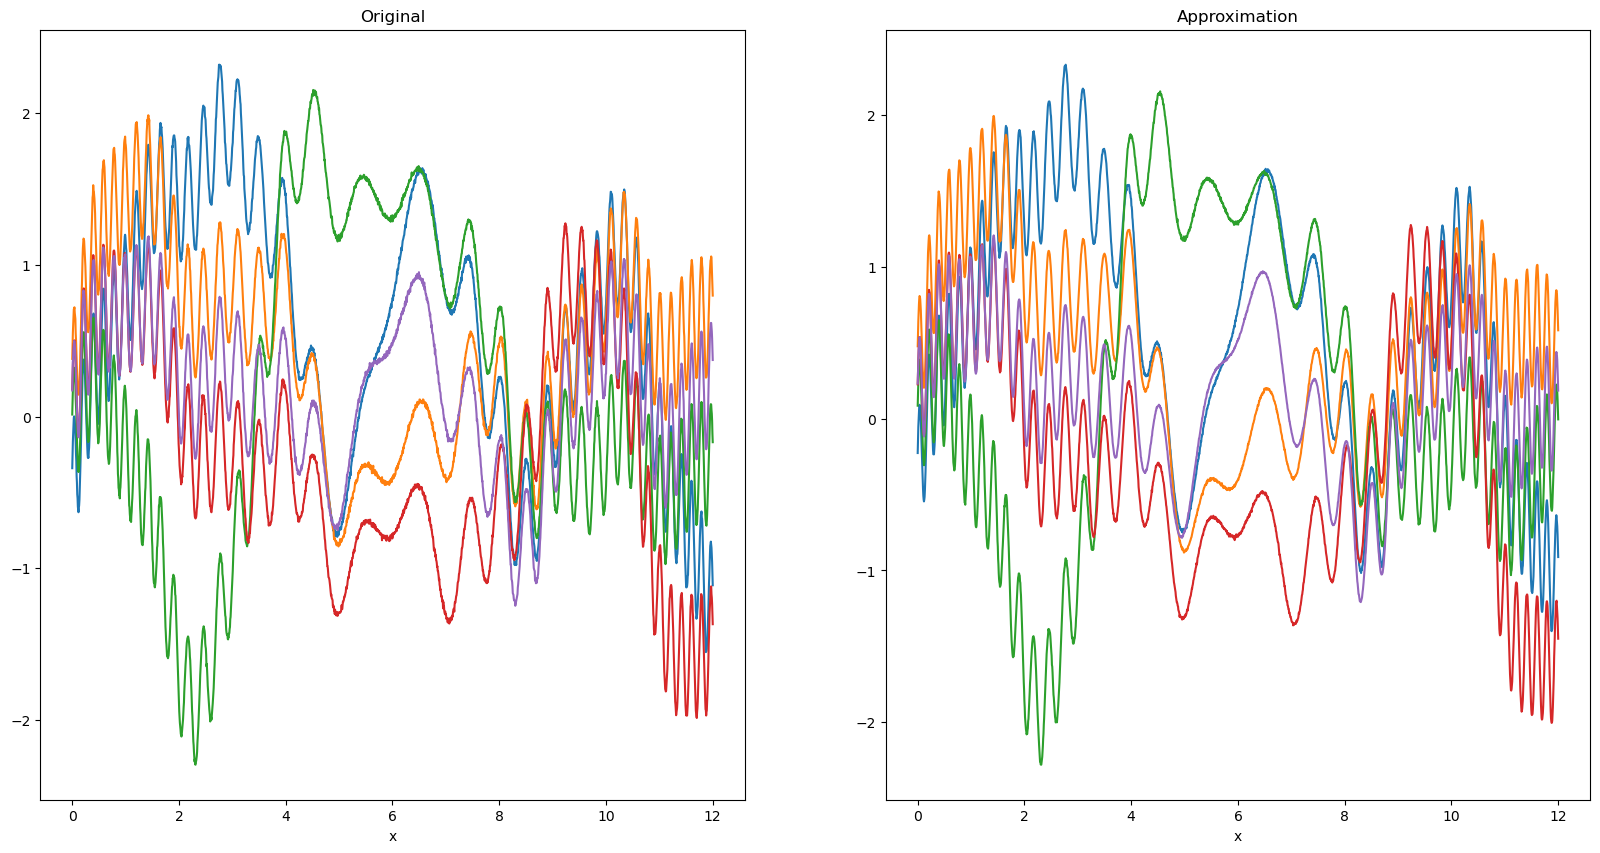

In [12]:
ds_approx = np.copy(ds)
print(ds_approx)
ds_approx[10:None] = 0
print(np.mean(data, axis=1)[:, None].shape)
X_approx = np.mean(data, axis=1)[:, None] + np.dot(dU[:, :40], np.dot(np.diag(ds_approx), dVt ) )

# lets compare samples side by side

fig, ax = plt.subplots(1,2, figsize=(20,10))


for i in range(5):

  ax[1].plot(grid, X_approx[:,i])
  ax[1].set_xlabel('x')
  ax[1].set_title('Approximation')

  ax[0].plot(grid, data[:,i])
  ax[0].set_xlabel('x')
  ax[0].set_title('Original')

plt.show()